In [1]:
from swarms import SizeDistribution
from swarms import CollSwarm
from numpy import linspace, zeros, logspace, array
import matplotlib.pyplot as plt

# Jupiter: An Example

For the following plots, the specifications of Jupiter will be used to demonstrate the different possible plots that swarms.py can produce. 

In [3]:
Dmin = 12e-6; Dmax = 15e4; M_init = 7.37307e19

jupiter = SizeDistribution(Dmin, Dmax, M0=M_init)

In [5]:
initial_swarm_mass = jupiter.Mtot()
initial_swarm_area = jupiter.Atot()
print("Swarm mass = {0:.5e} kg".format(initial_swarm_mass))
print("Swarm area = {0:.5e} m^2".format(initial_swarm_area))

Swarm mass = 7.39324e+19 kg
Swarm area = 9.18122e+16 m^2


## Area Plot

One can plot the total surface area of a swarm over time by repeatedly updating the swarm for every needed time step and record the specific area at that time. There is the option to specify a dynamic maximum object size that would decrease over time as specified in Kennedy 2010.

In [2]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)
jupiter_no_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=False)

In [3]:
time = linspace(0, 1e10, 50000)
area_correct = zeros(50000)
area_no_correct = zeros(50000)

for i in range(len(time)):
    a = jupiter_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    b = jupiter_no_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    area_correct[i] = a
    area_no_correct[i] = b
    jupiter_correct.updateSwarm(time[i])
    jupiter_no_correct.updateSwarm(time[i])

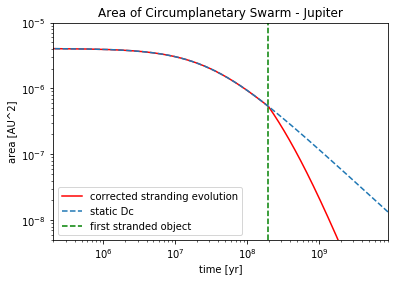

In [4]:
plt.loglog(time, area_correct, 'r', label="corrected stranding evolution")
plt.loglog(time, area_no_correct, ls='--', label="static Dc")
plt.axvline(jupiter_correct.tnleft, color='g', ls='--', label="first stranded object")
plt.xlabel("time [yr]")
plt.ylabel("area [AU^2]")
plt.title("Area of Circumplanetary Swarm - Jupiter")
plt.legend()
plt.xlim([2e5, 9e9])
plt.ylim([5e-9, 1e-5])
plt.show()

## Number Density Plot

Since it is possible to compute the number of objects in the swarm at any time with our code, an other possible plot that can be made is a size-distribution plot for logarithmic spaced times. 

In [5]:
jupiter_num = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

In [20]:
drange = linspace(0.1, 250000, 5000)
time_log = logspace(0, 10, 25)
num_distribution = []
Dc_list = []
for i in range(len(time_log)):
    jupiter_num.tnleft = 0.5e8
    jupiter_num.updateSwarm(time_log[i])
    num = []
    dcc = []
    for j in range(len(drange)):
        dcc.append(jupiter_num.swarm.Dc)
        num.append(jupiter_num.computen(drange[j]))
    num_distribution.append(num)
    Dc_list.append(dcc)
    

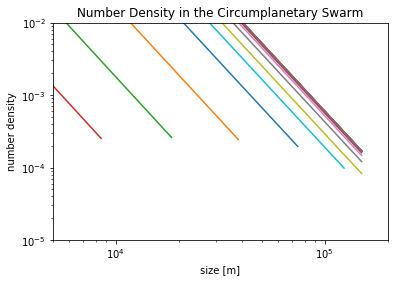

In [21]:
drange = array(drange)
for i in range(len(num_distribution)):
    num_dist = []
    prev_drange = []
    for j in range(len(num_distribution[i])):
        #print("drange = ", drange[j])
        #print("Dc = ", Dc_list[j])
        if drange[j] < Dc_list[i][j]:
            prev_drange.append(drange[j])
            num_dist.append(num_distribution[i][j])
    plt.loglog(prev_drange, num_dist)
#plt.loglog(Dc_list)
#print(Dc_list)
plt.xlim([5000, 200000])
plt.ylim([1e-5, 1e-2])
plt.xlabel("size [m]")
plt.ylabel("number density")
plt.title("Number Density in the Circumplanetary Swarm")
plt.show()

# Observable Quantities

## Flux Computations

We now demonstrate the important computations of thermal radiation flux as well as scattering flux produced by both the planet and the circumplanetary swarm. These values are critical, since they are the observable variables. The distance from the solar system, d_pl, used is 10 pc. We take a Jupiter mass planet orbiting an A5 main-sequence star.  

In [2]:
M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 250000.; L_s = 20 * 3.828e26;
M_s = 1.86 * 1.989e30; M_pl = 1.89587112e27; a_pl = 7.48e12
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = 3.086e17

jupiter5 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

jupiter5.updateSwarm(1e7) # Update the swarm to 4.5e9 years. 

waverange = logspace(-7, -3, 200)
Fth_planet = jupiter5.computeFth(waverange, planet=True)/1e-26
Fth_swarm = jupiter5.computeFth(waverange, swarm=True)/1e-26
Fs_planet = jupiter5.computeFs(waverange, 1., 0.52, planet=True)/1e-26
Fs_swarm = jupiter5.computeFs(waverange, 0.32, 0.08, swarm=True)/1e-26

C:\Users\loloynage\Documents\CE-Irregular-Satellites\swarms.py:210: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(h*(c/lamb)/(k_B*T)) - 1)


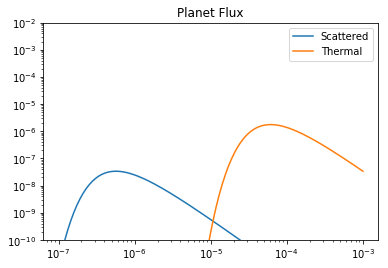

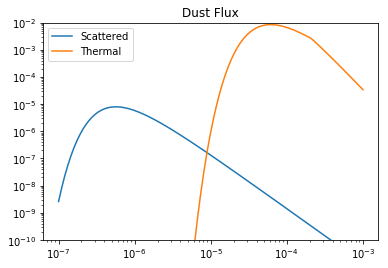

In [3]:
plt.figure(3)
plt.title('Planet Flux')
plt.loglog(waverange, Fs_planet, label="Scattered")
plt.loglog(waverange, Fth_planet, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

plt.figure(4)
plt.title('Dust Flux')
plt.loglog(waverange, Fs_swarm, label="Scattered")
plt.loglog(waverange, Fth_swarm, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

# Evolution of Debris Population

In [2]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter6 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

drange = linspace(0.01, 1.5e5, 2500)
#drange = logspace(2, 6, 1000)
time_log = logspace(6, 9.5, 10)
total_amount = []
b
# Testing
# num = []
#print(jupiter6.computeNtot(dlow=1000))
# for j in range(len(drange)):
#    num.append(jupiter6.computeNtot(dlow=drange[j]))
# total_amount.append(num)

for i in range(len(time_log)):
    jupiter6.updateSwarm2(time_log[i])
    num = []
    print(i)
    for d in drange:#j in range(len(drange)):
        Mt = jupiter6.swarm.Mtot(dlow=d, dhigh=Dmax)
        jupiter6.swarm.M0 = Mt
        #jupiter6.swarm.compute_kg_from_Mtot(Mt)
        #jupiter6.swarm.compute_ks_from_kg()
        #jupiter6.updateSwarm2(time_log[i], d)
        #print(jupiter6.swarm.M0)
        num.append(jupiter6.computeNtot(dlow=d)) #Make dhigh explicit
    total_amount.append(num)

0
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29478483479431.656
kg_val =  1859966565548.5474
lower =  0
upper =  132.4247395454834
str upper =  0.0
qg =  1.7
k_str =  25.102298722547957
Dmax =  150000.0
Dc =  150000.0
dlow =  45798.3262745098
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc


	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29559114713014.613
kg_val =  1865054052450.914
lower =  0
upper =  43.46577032192251
str u

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29559114713014.613
kg_val =  1865054052450.914
lower =  0
upper =  7.108625924993968
str upper =  0.0
qg =  1.7
k_str =  25.17095996535508
Dmax =  150000.0
Dc =  150000.0
dlow =  120168.06921568626
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc


	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

upper =  8.194268995520002
str upper =  0.0
qg =  1.7
k_str =  25.239809014319558
Dmax =  150000.0
Dc =  150000.0
dlow =  117106.84492997198
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29639966493758.14
kg_val =  1870155454938.357
lower =  0
upper =  7.660962791340291
str upper =  0.0
qg =  1.7
k_str =  25.239809014319558
Dmax =  150000.0
Dc =  150000.0
dlow =  118607.445070028
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlo

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29721039424915.438
kg_val =  1875270811073.5803
lower =  0
upper =  1007.3541331031754
str upper =  0.0
qg =  1.7
k_str =  25.30884638313953
Dmax =  150000.0
Dc =  150000.0
dlow =  18127.25969187675
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29721039424915.438
kg_val =  1875270811073.5803
lower =  0
upper =  986.411437485091
str upper =  0.0
qg =  1.7
k_str =  25.30884638313953
Dmax =  150000.0
Dc =  150000.0
dlow =  18307.33170868347
	 dlow <

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29802334111389.746
kg_val =  1880400159023.3984
lower =  0
upper =  61.53437442280479
str upper =  0.0
qg =  1.7
k_str =  25.378072586918226
Dmax =  150000.0
Dc =  150000.0
dlow =  63445.383921568624
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  29802334111389.746
kg_val =  1880400159023.3984
lower =  0
upper =  60.66445693917039
str upper =  0.0
qg =  1.7
k_str =  25.378072586918226
Dmax =  150000.0
Dc =  150000.0
dlow =  63805.52795518207
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlo

Dmax =  150000.0
Dc =  150000.0
dlow =  104501.80375350139
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlo

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  30779998604632.355
kg_val =  1942086618268.2915
lower =  0
upper =  74.51412010808447
str upper =  1.199403683952285
qg =  1.7
k_str =  27.902965259815158
Dmax =  150000.0
Dc =  145596.70334515648
dlow =  59243.70352941176
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  30779998604632.355
kg_val =  1942086618268.2915
lower =  0
upper =  11.601522987500196
str upper =  1.199403683952285
qg =  1.7
k_str =  27.902965259815158
Dmax =  150000.0
Dc =  145596.70334515648
dlow =  107983.19607843136
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  30779998604632.355
kg_val =  1942086618268.2915
lower =  0
upper =  11.313478319514635
str upper =  1.199403683952285
qg =  1.7
k_str =  27.902965259815158
Dmax =  150000.0
Dc =  145596.70334515648
dlow =  108583.43613445376
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  45310557105307.04
kg_val =  2858902878808.2725
lower =  0
upper =  5415.964816681757
str upper =  58.16712468948067
qg =  1.7
k_str =  94.

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  45310557105307.04
kg_val =  2858902878808.2725
lower =  0
upper =  0
str upper =  40.046129179311606
qg =  1.7
k_str =  94.5101182021667
Dmax =  150000.0
Dc =  97

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
ks_val =  109115942180332.39
kg_val =  6884750511855.694
lower =  0
upper =  32091.845024717742
str upper =  1007.9547376095906
qg =  1.7
k_str =  717.6881497627746
Dmax =  150000.0
Dc =  56664.450520342194
dlow =  6482.602605042017
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dl

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  109115942180332.39
kg_val =  6884750511855.694
lower =  0
upper =  0
str upper =  338.57071457811327
qg =  1.7
k_str =  717.6881497627746
Dmax =  150000.0
Dc =  56664.450520342194
dlow =  108163.26809523808
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
ks_val =  109115942180332.39
kg_val =  6884750511855.694
lower =  0
upper =  0
str upper =  316.9634551698554
qg =  1.7
k_str =  717.6881497627746
Dmax =  150000.0
Dc =  56664.450520342194
dlow =  110444.18030812324
	 dlow > Dc
	 d

	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dlow < Dc
	 dl

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dl

	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dlow > Dc
	 dl

In [4]:
print(time_log)

[1.00000000e+06 2.44843675e+06 5.99484250e+06 1.46779927e+07
 3.59381366e+07 8.79922544e+07 2.15443469e+08 5.27499706e+08
 1.29154967e+09 3.16227766e+09]


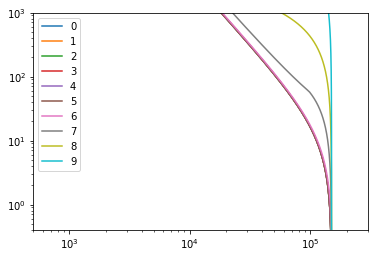

In [3]:
for i in range(len(total_amount)):
    plt.loglog(drange, total_amount[i], label=i)

plt.legend()
plt.ylim([4e-1, 1e3])
plt.xlim([5e2, 3e5])
plt.show()